# Descriptive statistics

- get overall info about participants
- assess normality of response times (RTs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import os

alpha = 0.05

d = pd.read_csv(os.path.join("..", "data", "serial-data.csv"), index_col=0)
agg = pd.read_csv(os.path.join("..", "data", "aggregated-data.csv"), index_col=0)

print("Loading:", len(d), "lines", len(d["ParticipantID"].unique()), "participants")

Loading: 21068 lines 229 participants


## Overall info about participants

In [2]:
TPP = 20  # there are 20 trials in practice
TPM = 72  # there are 72 trials in main part
TPL = 20  # there are 20 trials in a lexical test


print("Number of participants:")
display(pd.DataFrame(d["StudyID"].value_counts() / (TPP + TPM)))

print()
print()
print("Different kinds of designers:")

display(pd.DataFrame(d.groupby("StudyID")["Training"].value_counts() / (TPP + TPM)))

Number of participants:


,StudyID
Main,205.0
Pilot,24.0




Different kinds of designers:


Training
StudyID Training                  
Main    Non-designer         117.0
        Graphic designer      34.0
        Letter designer       30.0
        Other designer        19.0
        Typographer            5.0
Pilot   Non-designer          16.0
        Letter designer        6.0
        Typographer            2.0

# Assess normality of RTs

The distributions of RTs are not normal, but close enough.

Normality test for RT


,W,pval,normal
RT,0.752397,6.281341e-31,False


Normality test for RT (normalized)


,W,pval,normal
RT (normalized),0.996752,0.174677,True


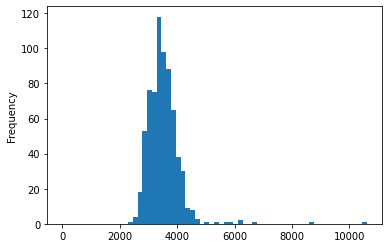

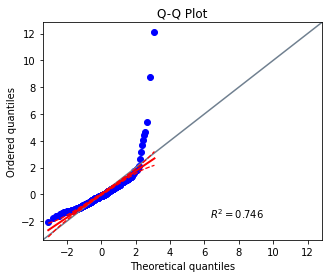

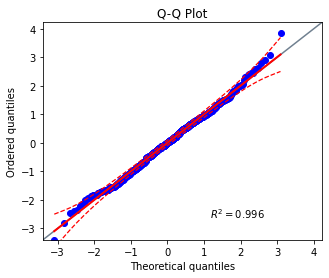

In [3]:
# assess normality of RTs
for col in ["RT", "RT (normalized)"]:
    rts = agg[col]
    rts.plot.hist(bins=50, sharey=True)
    
# test for normality
# null hypothesis: RTs come from a normal distribution
for col in ["RT", "RT (normalized)"]:
    print("Normality test for %s" % col)
    display(pg.normality(agg[col]))

# Q-Q plots
for col in ["RT", "RT (normalized)"]:
    pg.qqplot(agg[col], dist="norm")

,ParticipantID,Composite pair,Congruent pair,TestID,TrialID,Training,isDesigner,Correct,Correct (normalized),ET,RT,RT (normalized),Date,AUC,AUC (normalized),Type,Focus
StudyID,,,,,,,,,,,,,,,,,
Main,0,False,True,1,24,Letter designer,True,0.958333,3.010693,227.800000,2869.625000,7.930019,2022-06-09 10:51:13,0.958333,2.730455,Normal,Letters
Main,0,True,False,1,24,Letter designer,True,0.666667,2.094395,227.800000,2783.666667,7.915356,2022-06-09 10:51:13,0.687500,1.955193,Composite incongruent,Letters
Main,0,True,True,1,24,Letter designer,True,0.833333,2.617994,227.800000,2876.708333,7.930995,2022-06-09 10:51:13,0.819444,2.263849,Composite congruent,Letters
Main,1,False,True,1,24,Letter designer,True,0.916667,2.879793,188.900000,3219.500000,8.066865,2022-06-08 22:02:06,1.000000,3.141593,Normal,Letters
Main,1,True,False,1,24,Letter designer,True,0.666667,2.094395,188.900000,3379.666667,8.117099,2022-06-08 22:02:06,0.708333,2.000572,Composite incongruent,Letters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pilot,227,True,False,1,22,Non-designer,False,0.818182,2.570394,543.636364,2850.863636,7.948938,2022-05-23 18:01:23,NaN,NaN,Composite incongruent,None
Pilot,227,True,True,1,2,Non-designer,False,0.500000,1.570796,543.636364,2985.000000,7.996744,2022-05-23 18:01:23,NaN,NaN,Composite congruent,None
Pilot,228,False,False,1,9,Letter designer,True,0.777778,2.443461,568.181818,2934.333333,7.978502,2022-05-22 08:00:19,NaN,NaN,Normal,Letters


/var/folders/f2/mncm4dfn70gbl4mshhy77hbr0000gn/T/ipykernel_41520/1945890159.py:30: FutureWarning: ['Date', 'Focus'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Training         Type                                     
Graphic designer Composite congruent    2.175010  0.235971
                 Composite incongruent  2.091674  0.247773
                 Normal                 2.730514  0.251735
Letter designer  Composite congruent    2.292818  0.233359
                 Composite incongruent  2.214405  0.296461
                 Normal                 2.923926  0.274316
Non-designer     Composite congruent    2.059279  0.240167
                 Composite incongruent  1.892387  0.274825
                 Normal                 2.606279  0.340052
Other designer   Composite congruent    2.180058  0.194305
                 Composite incongruent  1.874611  0.416392
                 Normal                 2.757651  0.350214
Typographer      Composite congruent    2.158982  0.209475
                 Composite incongruent  2.298516  0.158425
                 Normal                 2.978743  0.173271

/var/folders/f2/mncm4dfn70gbl4mshhy77hbr0000gn/T/ipykernel_41520/1945890159.py:36: FutureWarning: ['Training', 'Date'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]


mean       std
Focus        Type                                     
Letters      Composite congruent    2.273698  0.232095
             Composite incongruent  2.226421  0.280729
             Normal                 2.931757  0.260948
None         Composite congruent    2.059279  0.240167
             Composite incongruent  1.892387  0.274825
             Normal                 2.606279  0.340052
Other design Composite congruent    2.176820  0.220027
             Composite incongruent  2.013859  0.331694
             Normal                 2.740242  0.287827

<AxesSubplot:title={'center':'AUC (normalized)'}, xlabel='Focus,Type'>

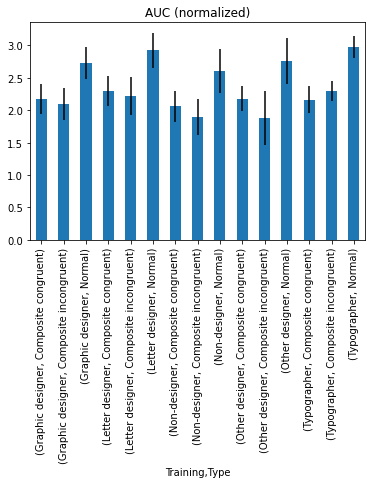

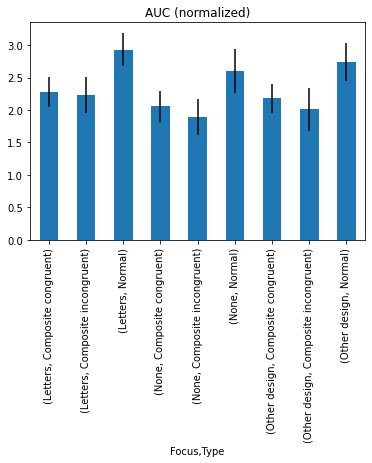

In [55]:
from copy import copy
# from scipy.stats import sem

agg["Type"] = "Normal"
conditions = [
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(True),
  agg["Composite pair"].eq(True) & agg["Congruent pair"].eq(False),
]
choices = [
  "Composite congruent",
  "Composite incongruent"
]
agg["Type"] = np.select(conditions, choices, default="Normal")
conditions = [
  agg["Training"].eq("Other designer"),
  agg["Training"].eq("Graphic designer"),
  agg["Training"].eq("Typographer"),
  agg["Training"].eq("Letter designer"),
]
choices = [
  "Other design",
  "Other design",
  "Letters",
  "Letters",
]
agg["Focus"] = np.select(conditions, choices, default="None")

display(agg)

auc = agg.groupby(["Training", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")

auc = agg.groupby(["Focus", "Type"]).agg([np.mean, np.std])[["ET", "RT", "RT (normalized)", "AUC", "AUC (normalized)"]]
auc.reset_index()
auc = auc["AUC (normalized)"]
display(auc)
auc.plot(kind="bar", stacked=False, y="mean", legend=False, yerr="std", title="AUC (normalized)")
